In [1]:
import os
import cv2
from tqdm import tqdm
import numpy as np
import argparse
import datetime
import requests
from collections import Counter

def find_max_connected_component(img):

    temp = cv2.threshold(img,127,255,cv2.THRESH_BINARY)[1]

    labels, ims = cv2.connectedComponents(temp[:,:,0])

    res = Counter(ims.flatten())
    res.pop(0,None)
    max_key = max(res,key = res.get)

    ims[ims!=max_key] = 0
    ims[ims==max_key] = 255
    return ims


kernel = np.ones((7,7),np.float32)/49


In [ ]:
idx = 1000
temp = cv2.imread(os.path.join('/home/jini1114/git/data/segmentation/r_cut_ine.mp4/%d.png'%(idx)))
temp[temp>150] = 255
temp[temp<=150] = 0
try :
    maximg = find_max_connected_component(temp)
except :
    maximg = temp[:,:,0]

gray = maximg
res = cv2.findContours(gray.astype(np.uint8), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
contours = res[-2]
area = []
for i in range(len(contours)):
    area.append(cv2.contourArea(contours[i]))
try:
    idx = np.where(np.max(area)==area)[0][0]
except :
    pass
try:
    cv2.drawContours(gray, contours, contourIdx=idx, color=(255,255,255),thickness=-1)
    dst = cv2.filter2D(gray,-1,kernel)
except :
    dst = gray


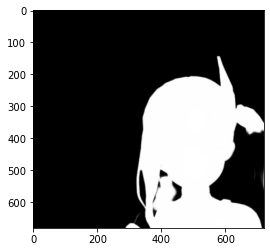

In [3]:
import matplotlib.pyplot as plt
temp = cv2.imread(os.path.join('/home/jini1114/git/data/temp/r_cut_lilpa.mp4/','%d.png'%(1000)))
plt.imshow(temp)

In [ ]:
seg_dir = '/home/jini1114/git/data/temp/r_cut_lilpa.mp4/'
frames = []

files = os.listdir(seg_dir)
for idx in range(len(files)):
    temp = cv2.imread(os.path.join(seg_dir,'%d.png'%(idx)))
    temp[temp>125] = 255
    temp[temp<=125] = 0

    dst = cv2.filter2D(temp,-1,kernel)

    frames.append(dst)

h,w,l = dst.shape
size = (w,h)

output = cv2.VideoWriter(os.path.join(out_dir,'seg_filter_'+origin_file_name),cv2.VideoWriter_fourcc(*'DIVX'),fps,size)

for i in tqdm(range(len(frames)),desc = 'mp4 making'):
    output.write(frames[i])

output.release()